# Camembert-Regression 


In [ ]:
import tensorflow as tf
tf.__version__

'2.0.0'

In [ ]:
import os
import re
import pandas as pd
from simpletransformers.classification import ClassificationModel
from simpletransformers.classification import ClassificationModel
from sklearn.metrics import explained_variance_score
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('./data_local/Mail.csv')

In [ ]:
class_count = df['Label'].value_counts()

Text(0, 0.5, 'Number of mail ')

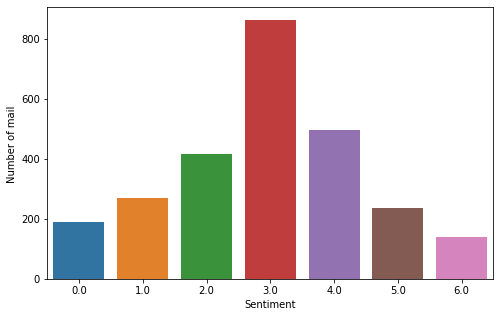

In [ ]:
x = np.array(class_count.index)
y = np.array(class_count.values)
plt.figure(figsize=(8,5))
sns.barplot(x,y)
plt.xlabel('Sentiment')
plt.ylabel('Number of mail ')

In [ ]:
df['Label'].unique()

array([3., 2., 4., 0., 1., 5., 6.])

In [ ]:
from collections import Counter

y=df.loc[:, 'Label'].values
print((Counter(y)))

Counter({3.0: 864, 4.0: 497, 2.0: 416, 1.0: 269, 5.0: 236, 0.0: 189, 6.0: 141})


In [ ]:
#train_df, eval_df= train_test_split(df, test_size=0.2, shuffle= True)

In [ ]:
#print('Nombre de commentaires dans le val_set:',len(eval_df))
#print('Nombre de commentaires dans le train_set:', len(train_df))


In [ ]:
#train_df.to_csv('./data_local/train.csv', index=False)
#eval_df.to_csv('./data_local/val.csv', index=False)

# Data train and DATA test

In [ ]:
train_df =  pd.read_csv('./data_local/train.csv')
eval_df  =  pd.read_csv('./data_local/val.csv')

In [ ]:
len(eval_df), len(train_df)

(523, 2089)

In [ ]:
print(eval_df['Label'].unique())
print(train_df['Label'].unique())

[4. 3. 2. 1. 5. 0. 6.]
[2. 1. 3. 0. 6. 4. 5.]


In [ ]:
train_df.shape, eval_df.shape

((2089, 2), (523, 2))

# Pretraitement des données 

In [ ]:
def clean_text(text):
    """
        text: a string

        return: modified initial string
    """
    text = text.lower()                                              # lowercase text
    text = re.sub('-', ' ',   text)                                 #replace '-' with space
    text = re.sub(r"\d", "", text)                                 # remove number
    text = re.sub(r"\s+", " ", text, flags=re.I)                  # remove space
    text = re.sub(r"[^\w\d'\s]+", '', text)                      # remove punctuation sauf '
    
    return text

In [ ]:
eval_df['Texte']   =   eval_df['Texte'].apply(clean_text)
train_df['Texte']  =   train_df['Texte'].apply(clean_text)
df['Mail']        =   df['Mail'].apply(clean_text)

# Max de la séquence d'entrer


In [ ]:
max_lengh_val = max([len(s.split()) for s in eval_df.loc[:, 'Texte'].values])
max_lengh_train = max([len(s.split()) for s in train_df.loc[:, 'Texte'].values])

In [ ]:
max_lengh_val, max_lengh_train

(219, 313)

In [ ]:
os.makedirs("data_local", exist_ok=True)

In [ ]:
train_df.to_csv("data_local/regression_train_tessi.tsv", sep="\t", index=False)
eval_df.to_csv("data_local/regression_eval_tessi.tsv", sep="\t", index=False)

In [ ]:
train_tessi =  pd.read_csv("data_local/regression_train_tessi.tsv", sep="\t")
eval_tessi  =  pd.read_csv("data_local/regression_eval_tessi.tsv", sep="\t")

Hyperparametre 

In [ ]:
train_args = {
    "reprocess_input_data": False,
    "overwrite_output_dir": True,
    'lazy_text_column': 0,
    'lazy_text_a_column': 0,
    'lazy_text_b_column': 0,
    'lazy_labels_column': 1,
    'lazy_header_row': True,
     "lazy_header_row": True,
    'truncation':True,
     "regression": True,
     "max_seq_length" : 320,
    'fp16': False, # not using mixed precision 
    'train_batch_size': 8, # default is 8
    'do_lower_case': True,
    'learning_rate': 4e-5,# using lower learning rate
    'overwrite_output_dir': True, # important for CV
    'num_train_epochs':  90,
    'use_early_stopping': True,
    "output_dir" : "./bert_output/checkpoint/"
    
}

# Charger le modele Cammembert

In [ ]:
model = ClassificationModel("camembert", "camembert-base", num_labels=1,use_cuda=True, args=train_args)

In [2]:
import time
debut = time.time()

Model Train

In [ ]:
score = model.train_model(train, overwrite_output_dir=True, output_dir="./outputs/checkpoint/")



In [ ]:
fin = time.time()
print("temps de calcul", fin - debut)

# Evaluation

In [ ]:

result_test, model_outputs_test, wrong_predictions_test = model.eval_model(eval_tessi, mse = sklearn.metrics.mean_squared_error, mae=sklearn.metrics.mean_absolute_error, maxi = sklearn.metrics.max_error,r2=sklearn.metrics.r2_score)



/home/ssalim/.local/lib/python3.7/site-packages/simpletransformers/classification/classification_model.py:689: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


In [ ]:

result_train, model_outputs_train, wrong_predictions_train  = model.eval_model(train_tessi, mse = sklearn.metrics.mean_squared_error, mae=sklearn.metrics.mean_absolute_error, maxi = sklearn.metrics.max_error,r2=sklearn.metrics.r2_score)




/home/ssalim/.local/lib/python3.7/site-packages/simpletransformers/classification/classification_model.py:689: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


In [ ]:
result_train

{'mse': 0.22040221,
 'mae': 0.23041031,
 'maxi': 3.7896378,
 'r2': 0.904344851628026,
 'eval_loss': 0.21966638905618283}

In [ ]:
result_test

{'mse': 0.23325017,
 'mae': 0.2379305,
 'maxi': 2.958418,
 'r2': 0.8890932065819713,
 'eval_loss': 0.23109525593110558}

In [ ]:
pred_test = model.predict(eval_tessi['Texte'].values)
Y_test = eval_tessi['Label'].values

In [ ]:
pred = pred_test[0]

In [ ]:
total = len(Y_test)

good = 0
top1 = 0

for i in range(len(pred)):
    if np.round(pred[i]) == Y_test[i] or np.round(pred[i] + 0.5) == Y_test[i] or np.round(pred[i] - 0.5) == Y_test[i]:
        good += 1
    if np.round(pred[i]) == Y_test[i]:
        top1 += 1
        
print("presecion test", good/total)
print("TOP 1 : ", top1/total)

presecion test 0.9330783938814532
TOP 1 :  0.8852772466539197


# Prediction

In [ ]:
predictions, raw_outputs = model.predict(["veuillez trouver ci joint le dossier, merci"])



In [ ]:
predictions.tolist()

3.0829691886901855

In [ ]:
if round(predictions.tolist())  ==  0:
     print("le client est trés trés mecontent")
        
elif round(predictions.tolist()) == 1:
    print("le client est trés mecontent")
    
elif round(predictions.tolist()) == 2:
    print("le client est mecontent")
    
elif round(predictions.tolist()) == 3:   
    print("le client a un sentment neutre")
    
elif round(predictions.tolist()) == 4:
    print("le client est content")
    
elif round(predictions.tolist()) == 5:
    print("le client est trés content")
    
else:
    print("le client est trés trés content")


le client est content


# Save model

In [ ]:
model.model.save_pretrained('./outputs')